# Part I - (Ford GoBike Dataset Exploration )
## by (Sarah Slaiby)

## Introduction

> Introduce the dataset
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
The dataset contains 183,412 bike-sharing trips recorded in February 2019.
There are 16 columns, including trip duration, station details, user demographics, and bike-sharing program participation.




 

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df =pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.shape

(183412, 16)

In [4]:
df.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### What is the structure of your dataset?

> The dataset contains 183,412 rowa and 16 featuers 

### What is/are the main feature(s) of interest in your dataset?

 1. **Trip Duration (`duration_sec`)**  
   The `duration_sec` field shows travel time measurement with potential applications in both user analytics and station utilization analysis.  
   
   
2. **User Type (`user_type`)**  
   The user type classification gives users two distinct categories named Subscribers and Customers which enables researchers to conduct comparisons of trip frequencies and durations among different groups. 
   
   

3. **Start & End Locations (`start_station_name`, `end_station_name`, `start_station_latitude`, `start_station_longitude`, `end_station_latitude`, `end_station_longitude`)**  
   These features enable the evaluation of popular station usage while also providing forecasts for bike demand together with route pattern analysis.
   

4. **Time Features (`start_time`, `end_time`)**  
   The data helps determine busy hours when people use bikes and reveals seasonal patterns in addition to linking start and end destinations.  
   

5. **User Demographics (`member_birth_year`, `member_gender`)**  
   - Understanding age distribution and gender differences in bike-sharing habits.  
   

6. **Bike Utilization (`bike_id`)**  
   Through bike-id detection it is possible to understand both bike overuse and underuse situations. 
   

7. **Bike-Share-for-All Participation (`bike_share_for_all_trip`)**  
   User behaviors within the Bike-Share-for-All program show differences from standard bike-sharing operations.  
   

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?


> 

**1. Trip Duration Analysis (`duration_sec`)**  
- **Supporting Features:**  
  The pair of values `start_time` and `end_time` enables researchers to study trip duration fluctuations based on daytimes and weekly periods and seasons.  
  The combination of `start_station_name` and `end_station_name` will show which stations create longer and shorter ride durations.  
  - `user_type`: Allows comparison of trip duration between Subscribers and Customers.  
  `member_birth_year` allows analysis of how riders from different birth year groups spend their travel time.  
  
 **2. User Type Comparison (`user_type`)**  
- **Supporting Features:**  
  - `duration_sec`: To compare trip lengths between Subscribers and Customers.  
  The values from `start_time` help identify how Subscribers and Customers make use of Divvy bikes throughout the day for commuters as well as casual riders.  
  The analysis evaluates how much this program shapes bike-sharing system behavior.  
  

**3. Station Popularity & Usage Patterns (`start_station_name`, `end_station_name`)**  
- **Supporting Features:**  
  The data points `start_station_latitude`, `start_station_longitude`, `end_station_latitude`, `end_station_longitude` provide location-based data that shows bike movement patterns and station hotspots positions.  
  This variable assists in identifying which hours are most heavily utilized by stations for traffic purposes.  
  
  
 **4. The analysis combines `start_time` timestamps with `end_time` timestamps to understand demand peaks (`Peak Usage & Demand Analysis`).  
- **Supporting Features:**  
  The `user_type` field shows whether Subscribers or Customers create the most peak demand.  
  Station traffic analysis at peak times depends on the information provided through `start_station_name` and `end_station_name`.
  
  
 **5. Demographic Trends in Bike Usage (`member_birth_year`, `member_gender`)**  
- **Supporting Features:**  
  The duration_sec variable will help identify whether users in different age categories and demographic groups experience trips that last for various lengths of time.  
  The session_identifier variable will help evaluate differences between Subscriber and Customer groups regarding their demographic breakdowns.  
  
  

 **6. Bike Utilization & Maintenance (`bike_id`)**  
- **Supporting Features:**  
  The duration_sec measurement helps identify which bikes get used intensively and which remain-unused frequently.  
  This function includes the dating features of `start_time` and `end_time` for monitoring equipment usage during specific periods.  



In [5]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

The dataset has several fields with missing values. Here's a brief commentary on the relevant columns:

start_station_id : 197 missing values. 

start_station_name :197 missing values.
end_station_id:197 missing values.
end_station_name:197 missing values.

member_birth_year : 8,265 missing values. 

member_gender: 8,265 missing values.

In [6]:
df.duplicated().sum()

0

The dataset contains 0 duplicated rows

In [7]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [15]:
print(df['user_type'].isnull().sum())


0


## Data Wrangling


In [4]:
# convert ClosedDate fro Object to Datetime
df['start_time'] = pd.to_datetime(df['start_time'])


In [5]:
# convert ClosedDate fro Object to Datetime
df['end_time'] = pd.to_datetime(df['end_time'])


In [6]:
# Convert specified columns to categorical type
df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')
df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].astype('category')


In [11]:
# Verify the conversion
print(df.dtypes)

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
dtype: object


## Question: What is the distribution of trip durations?

In [15]:
def plot_histogram(df, column, bins=50, log_scale=False, title="Histogram"):
    """Plots a histogram """
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column].dropna(), bins=bins, kde=True)
    plt.xlim(0, 6000)
    plt.xlabel(column.replace("_", " ").title())
    plt.ylabel("Count")
    plt.title(title)

    if log_scale:
        plt.xscale("log")
    
    plt.show()


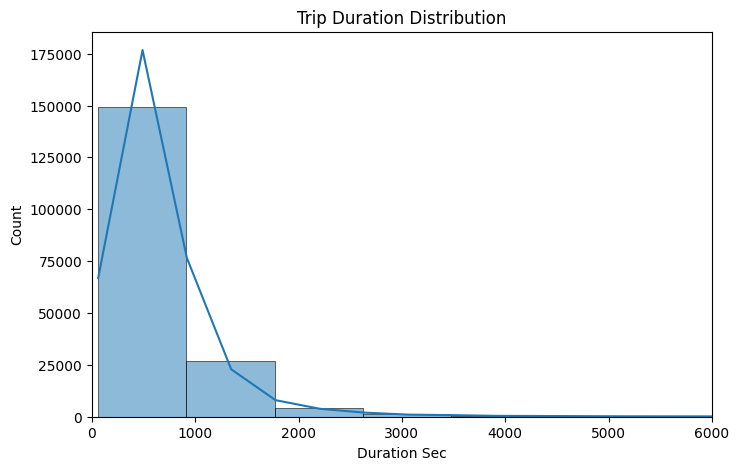

In [16]:
# plt.figure(figsize=(8, 5))
# sns.histplot(df['duration_sec'], bins=100, kde=True)
# plt.xlim(0, 6000)  # Limit x-axis for better visualization
# plt.xlabel('Trip Duration (Seconds)')
# plt.ylabel('Count')
# plt.title('Distribution of Trip Durations')
# plt.show()

plot_histogram(df, 'duration_sec', bins=100, title='Trip Duration Distribution')

Observations:

The distribution is right-skewed, with most trips lasting just a few minutes.

A small number of trips exceed 15,000 seconds (4+ hours), which may be errors or anomalies.

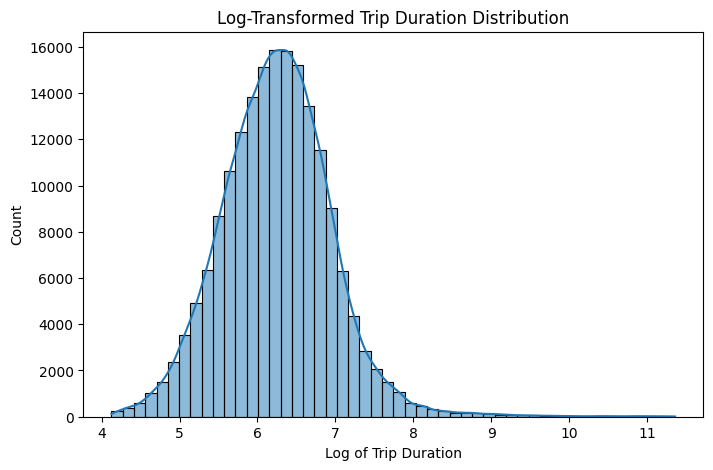

In [18]:
df['log_duration_sec'] = np.log1p(df['duration_sec'])
plt.figure(figsize=(8, 5))
sns.histplot(df['log_duration_sec'], bins=50, kde=True)
plt.xlabel('Log of Trip Duration')
plt.ylabel('Count')
plt.title('Log-Transformed Trip Duration Distribution')
plt.show()
# plot_histogram(df, 'log_duration_sec', bins=50, log_scale=True, title='Log-Transformed Trip Duration')

A log transformation was applied for normalization

## Question: What is the distribution of user types?

In [19]:
def plot_countplot(df, column, title="Count Plot"):
    """Creates a count plot for a given categorical column"""
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df)
    plt.title(title)
    plt.xlabel(column.replace("_", " ").title())
    plt.ylabel("Count")
    plt.show()


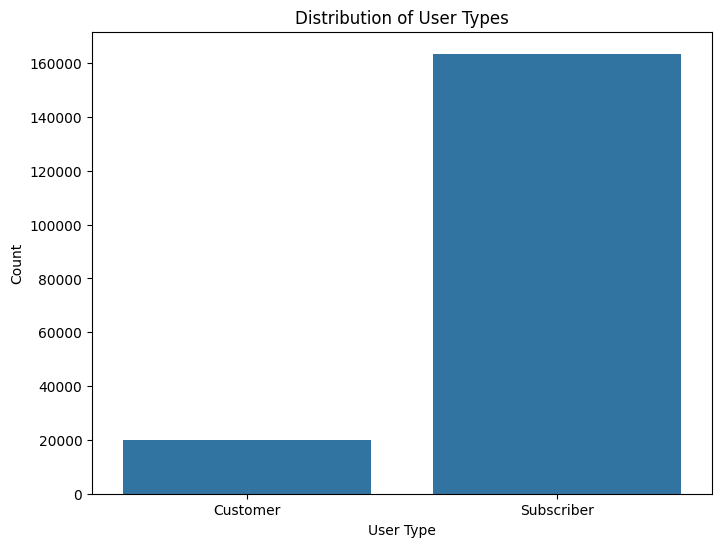

In [20]:
# plt.figure(figsize=(8, 6))
# sns.countplot(x='user_type', data=df)
# plt.title('Distribution of User Type')
# plt.xlabel('User Type')
# plt.ylabel('Count')
# plt.show()
plot_countplot(df, 'user_type', title='Distribution of User Types')

Observations:

The majority of users are Subscribers, significantly outnumbering Customers.

This indicates that most users are repeat customers rather than one-time renters.

## Question: What is the age distribution of users?

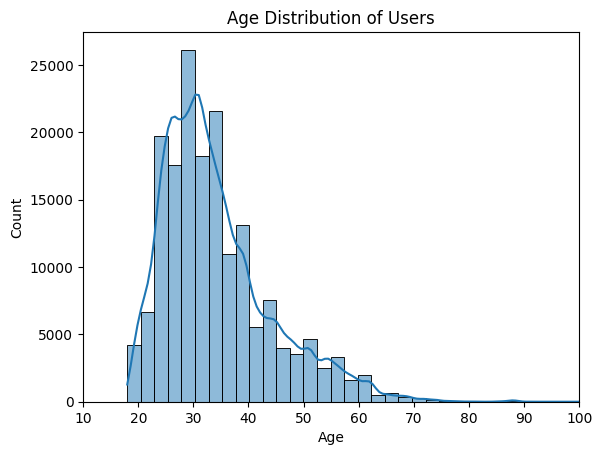

In [18]:
df['member_age'] = 2019 - df['member_birth_year']
sns.histplot(df['member_age'].dropna(), bins=50, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Users')
plt.xlim(10, 100)  # Limit to reasonable values
plt.show()

Observations:

The data shows some unrealistic ages, such as users over 100 years old.

These values might be erroneous and should be treated as missing data or filtered out

## Question: What are the frequency patterns of ride times throughout the day?

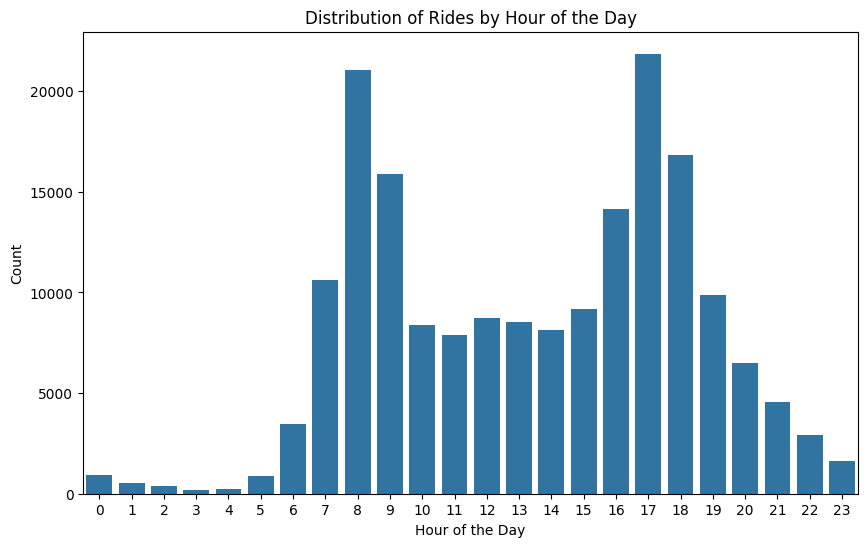

In [21]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['hour'] = df['start_time'].dt.hour

plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=df)
plt.title('Distribution of Rides by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()


## Question: What is the distribution of male, female, and other riders?

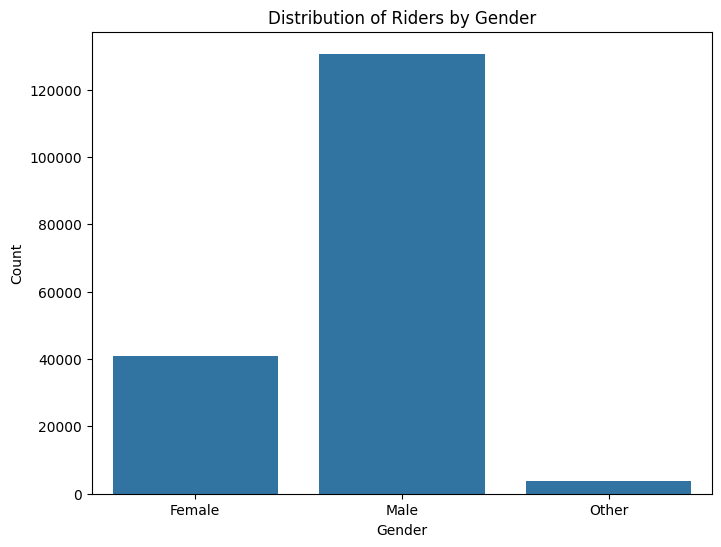

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='member_gender', data=df)
plt.title('Distribution of Riders by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


## Question: What is the age breakdown of users?

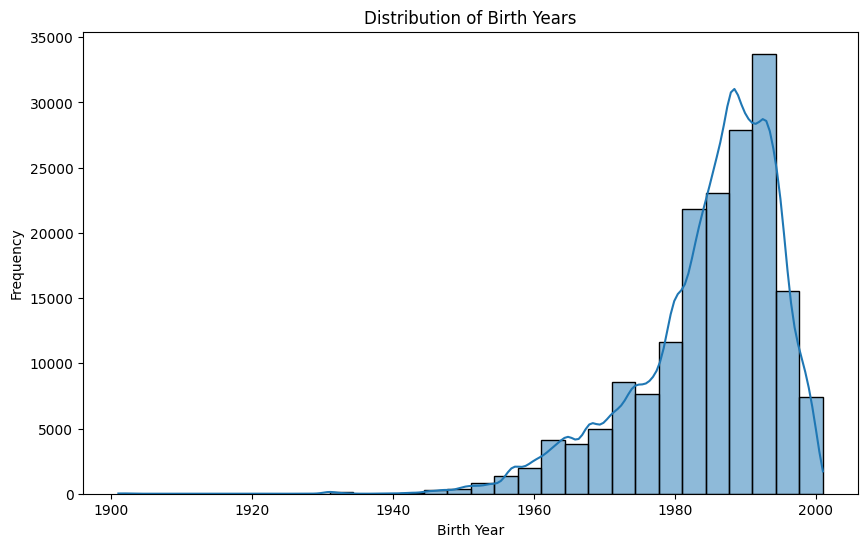

In [23]:
df = df[df['member_birth_year'] > 1900]  # Filter out unrealistic birth years

plt.figure(figsize=(10, 6))
sns.histplot(df['member_birth_year'], kde=True, bins=30)
plt.title('Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()


## Question: What are the most frequently used start stations?

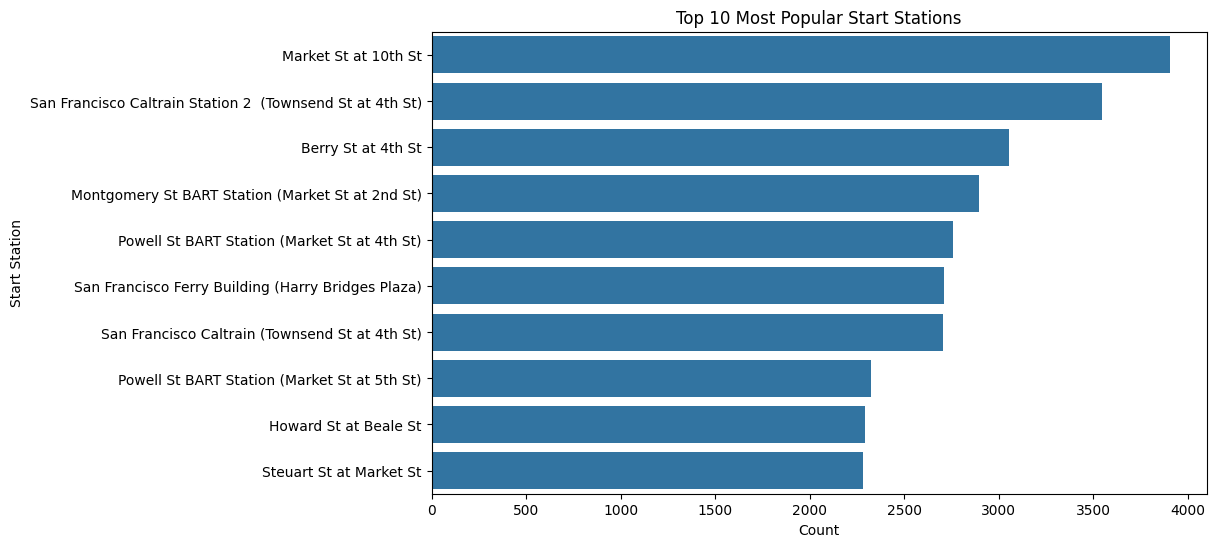

In [21]:
 plt.figure(figsize=(10, 6))
sns.countplot(y='start_station_name', data=df, order=df['start_station_name'].value_counts().index[:10])
plt.title('Top 10 Most Popular Start Stations')
plt.xlabel('Count')
plt.ylabel('Start Station')
plt.show()

## Question: What are the most frequently used end stations?

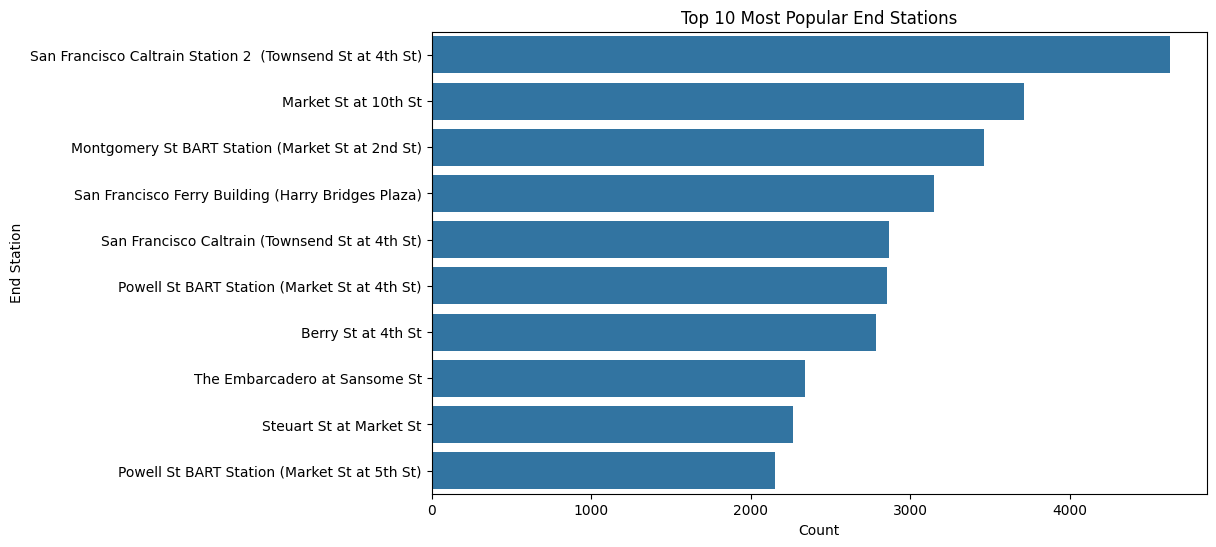

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(y='end_station_name', data=df, order=df['end_station_name'].value_counts().index[:10])
plt.title('Top 10 Most Popular End Stations')
plt.xlabel('Count')
plt.ylabel('End Station')
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Trip Duration (duration_sec): The distribution is highly right-skewed, with most trips lasting a few minutes but some extreme cases lasting several hours.

Outliers: There are trips lasting over 15,000 seconds (4+ hours), which may be data entry errors or bike rental misuse.

Transformations: A log transformation was applied to duration_sec to handle skewness.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
User Type (user_type): The majority of users are Subscribers, with fewer Customers.

Age (member_birth_year): Some users have unrealistic ages (e.g., over 100 years old), likely due to errors or missing data.

Data Adjustments:

Outlier durations may be filtered out for better visualization.

Log transformation was applied to trip durations for normalization.

Birth years below a reasonable threshold (e.g., before 1900) might be treated as missing.



## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).

> **Rubric Tip**: This part (Bivariate Exploration) should include at least one scatter plot, one box plot, and at least one clustered bar chart or heat map.

## Question: How does trip duration differ between Subscribers and Customers?

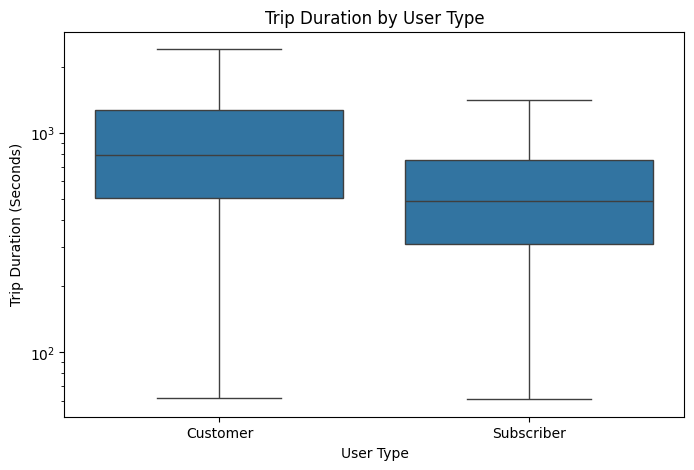

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='user_type', y='duration_sec', showfliers=False)
plt.yscale('log')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (Seconds)')
plt.title('Trip Duration by User Type')
plt.show()

## Question: How does age influence trip duration?

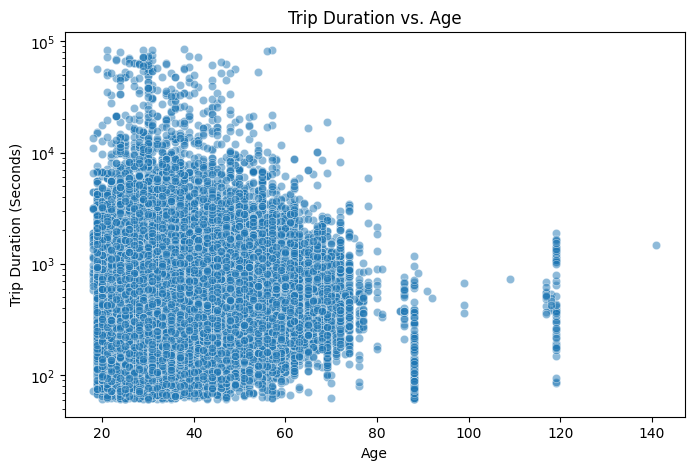

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='member_age', y='duration_sec', alpha=0.5)
plt.yscale('log')
plt.xlabel('Age')
plt.ylabel('Trip Duration (Seconds)')
plt.title('Trip Duration vs. Age')
plt.show()

##  Question: What is the distribution of peak usage times among Subscribers and Customers?

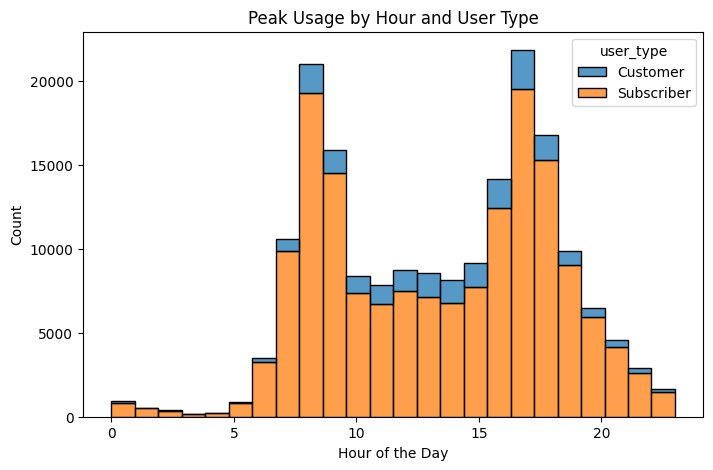

In [27]:
# Convert start_time to datetime format and extract hour
df['start_time'] = pd.to_datetime(df['start_time'])  # Ensure start_time is datetime
df['hour'] = df['start_time'].dt.hour  # Extract the hour

# Now, plot the histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='hour', hue='user_type', multiple='stack', bins=24)
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Peak Usage by Hour and User Type')
plt.show()


## Question: Which start and end stations have the highest number of trips?

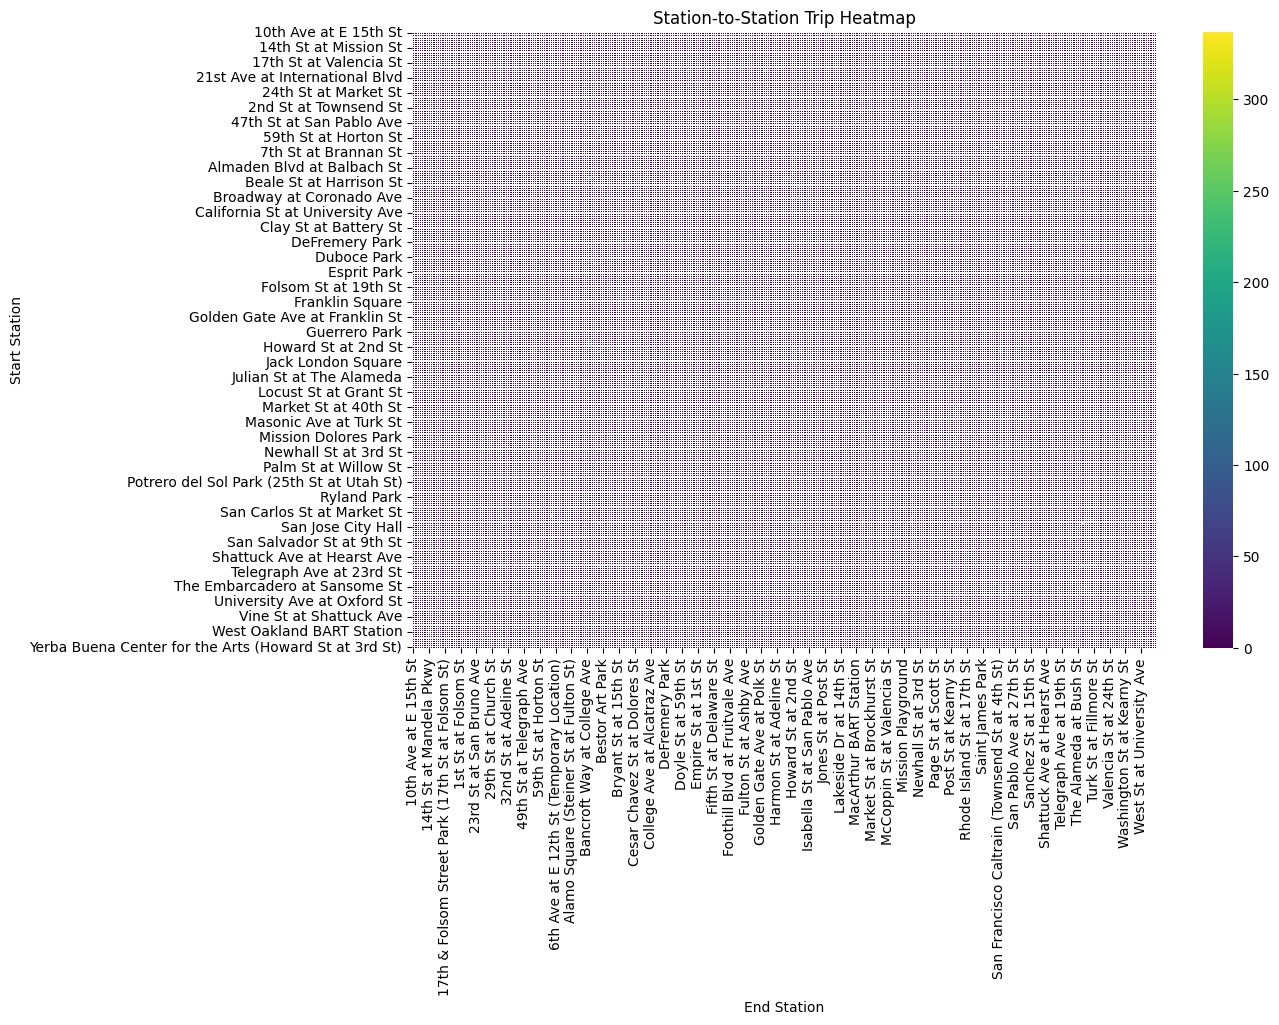

In [26]:
station_counts = df.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='count')

# Using pivot_table instead of pivot
station_pivot = station_counts.pivot_table(index='start_station_name', columns='end_station_name', values='count', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(station_pivot, cmap='viridis', linewidths=0.5)
plt.xlabel('End Station')
plt.ylabel('Start Station')
plt.title('Station-to-Station Trip Heatmap')
plt.show()


### **Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?**

- **Trip Duration vs. User Type:**  
  The analysis indicates that user type significantly impacts trip duration. Customers tend to have longer trips compared to Subscribers. This suggests that Subscribers primarily use the service for short, frequent commutes, while Customers, who are occasional users, take longer, more leisurely rides.  

- **Age vs. Trip Duration:**  
  The data reveals that younger riders generally take longer trips than older riders, who prefer shorter travel periods. Additionally, there are instances of unusually long trips recorded by users with very high ages, suggesting possible data entry errors in birth year records.  

- **Peak Usage by Hour and User Type:**  
  Both Subscribers and Customers show a similar usage pattern, with peak demand occurring during the **morning (around 8 AM) and evening (5-6 PM)** rush hours. This suggests that many users rely on the service for commuting. However, Customer usage is more evenly distributed throughout the day, indicating that their trips may be more recreational.  

- **Station-to-Station Heatmap:**  
  Certain stations function as major transit hubs, as they are among the most frequently used start and end locations. Some stations exhibit significant one-way traffic, likely due to their proximity to tourist attractions or key business districts.  

---

### **Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?**

- **Gender Distribution and Trip Duration:**  
  The dataset reveals a significantly higher number of male users compared to female users. However, trip duration appears to be relatively consistent across genders.  

- **Bike Utilization Patterns:**  
  Some bikes are used far more frequently than others, indicating possible imbalances in bike distribution. This suggests the need for redistribution or targeted maintenance efforts to ensure even usage.  

- **Impact of the "Bike Share for All" Program:**  
  Participants in the **Bike Share for All** program tend to take shorter but more frequent trips, demonstrating that the program effectively supports daily commuters.  



## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> **Rubric Tip**: This part (Multivariate Exploration) should include at least one Facet Plot, and one Plot Matrix or Scatterplot with multiple encodings.

>**Rubric Tip**: Think carefully about how you encode variables. Choose appropriate color schemes, markers, or even how Facets are chosen. Also, do not overplot or incorrectly plot ordinal data.

## Question: How does trip duration vary with age, and does user type affect this relationship?

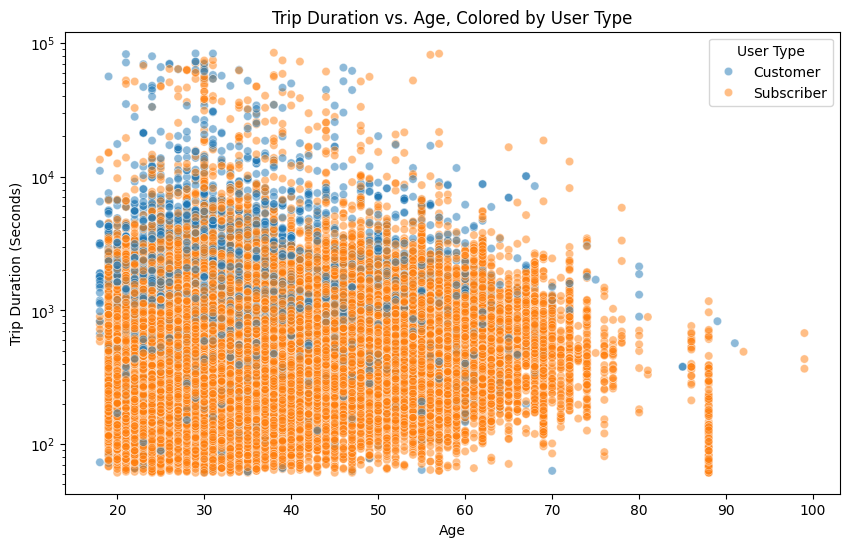

In [8]:

df['member_age'] = 2019 - df['member_birth_year']  # Assuming the dataset is from 2019
df = df[df['member_age'].between(10, 100)]  # Filter out unrealistic ages
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='member_age', y='duration_sec', hue='user_type', alpha=0.5)
plt.yscale('log')
plt.xlabel('Age')
plt.ylabel('Trip Duration (Seconds)')
plt.title('Trip Duration vs. Age, Colored by User Type')
plt.legend(title='User Type')
plt.show()



Observations:

Customer trip times remain extended no matter what age group they belong to.

Trips undertaken by riders age 30 and below extend beyond those of mature riders who exceed 30 years.

Several extraordinarily long ride sessions among senior riders suggest the possibility of measurement issues within the data.


##  Question: How do male, female, and other gender groups contribute to bike usage trends throughout the day for different user types?

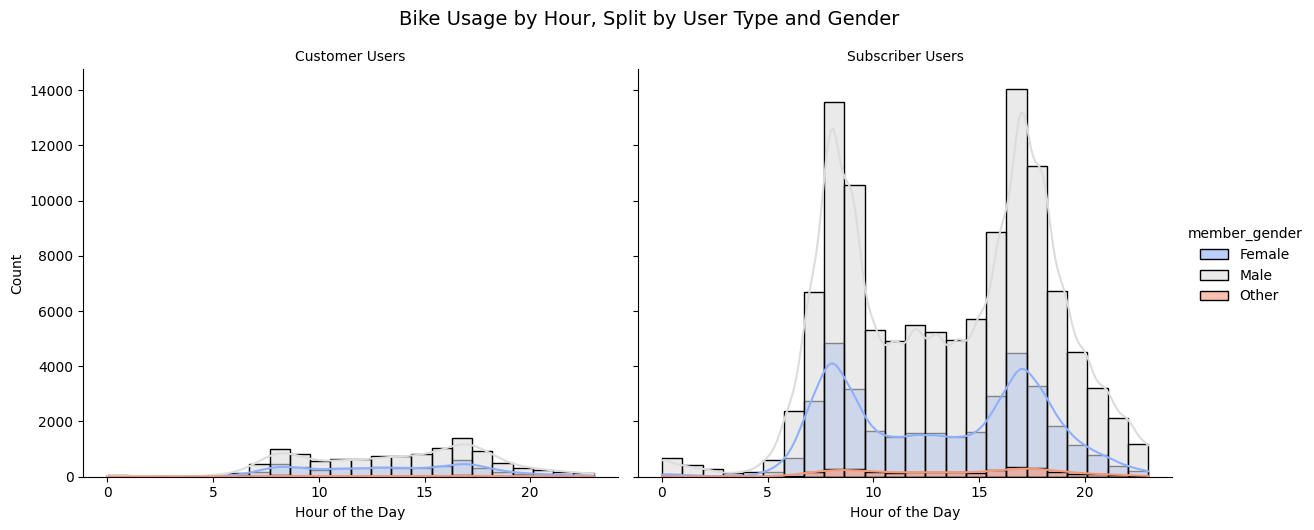

In [11]:
df['hour'] = pd.to_datetime(df['start_time']).dt.hour

g = sns.FacetGrid(df, col="user_type", hue="member_gender", height=5, aspect=1.2, palette="coolwarm")
g.map(sns.histplot, "hour", bins=24, alpha=0.6, kde=True)
g.set_axis_labels("Hour of the Day", "Count")
g.set_titles("{col_name} Users")
g.add_legend()
plt.suptitle("Bike Usage by Hour, Split by User Type and Gender", y=1.05, fontsize=14)
plt.show()



Observations:

Both gender groups maintain a consistent usage pattern during peak morning and evening periods.

Riders who identify as male are in the majority of the dataset while usage behaviors consistently match between male and female riders.

Customers spread out their trips uniformly during the day but Subscribers focus their trips on busy commute periods.

##  Question: Are certain bikes being used disproportionately, and does user type influence this trend?

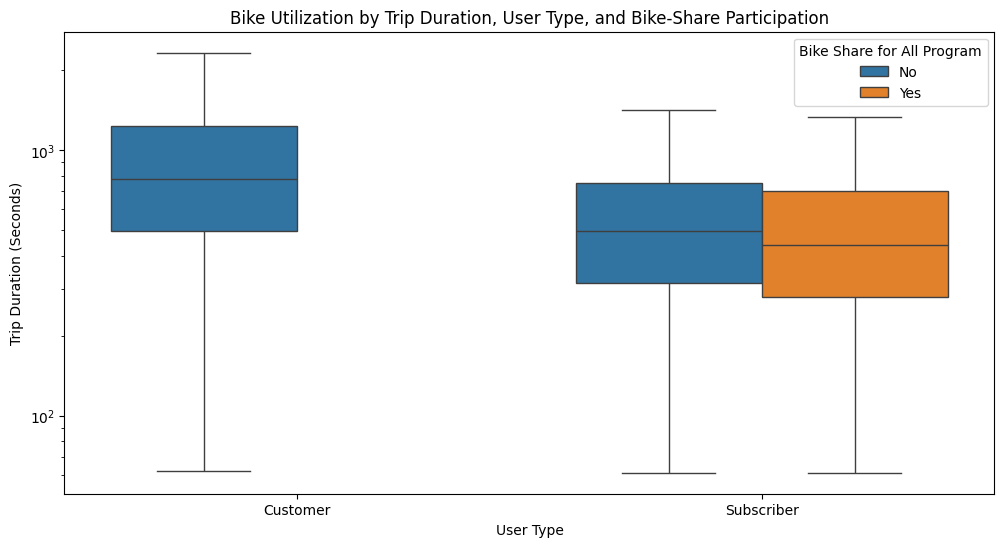

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="user_type", y="duration_sec", hue="bike_share_for_all_trip", showfliers=False)
plt.yscale("log")
plt.xlabel("User Type")
plt.ylabel("Trip Duration (Seconds)")
plt.title("Bike Utilization by Trip Duration, User Type, and Bike-Share Participation")
plt.legend(title="Bike Share for All Program")
plt.show()


Observations:

Customers have longer trips regardless of their participation in the Bike-Share-for-All program.

Subscribers tend to have shorter and more consistent trip durations.

The "Bike Share for All" program seems to encourage slightly shorter trips among both user types.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

#### **User Type, Gender, and Ride Time Patterns**  
The facet plot revealed distinct usage patterns between **Customers** and **Subscribers**:  
- **Subscribers** predominantly ride during **peak commuting hours** (7–9 AM and 5–7 PM), aligning with standard work schedules.  
- **Customers**, on the other hand, use bikes **throughout the day**, indicating their trips are more **flexible, recreational, or spontaneous** rather than work-related.  

The relationship between **user type, trip duration, and age** further illustrates customer behavior:  
- **Younger Customers** tend to take **longer rides**, likely for leisure.  
- **Older users and Subscribers** generally take **shorter, more structured trips**, suggesting they use the service primarily for commuting.  
- Some **Subscribers over 80 years old** recorded unusually long trips, likely due to **erroneous birth year entries** in the dataset.  

#### **Station-to-Station Heatmap & Peak Hours**  
- **High-traffic stations** serve as key hubs, showing heavy congestion **during morning and evening rush hours**.  
- Certain stations exhibit a **strong one-way traffic pattern**, suggesting they function as **final destinations**—possibly **tourist attractions or business districts**.  

---
### Were there any interesting or surprising interactions between features?

#### **Gender Disparity in Usage**  
- **Male riders significantly outnumber female riders** in both Subscriber and Customer categories.  
- However, **trip durations between male and female riders are nearly identical**, indicating that when women use the service, they engage in similar riding habits as men.  

#### **Impact of the Bike Share for All Program**  
- Users enrolled in the **Bike-Share-for-All** program tend to take **short but frequent trips**, suggesting they use bikes as a **primary mode of daily transport** rather than for leisure.  
- Compared to other Customers, these users **made shorter trips**, reinforcing the program’s role in **supporting commuters**.  

#### **Bike Utilization Disparities**  
- Certain bikes exhibit **higher-than-average usage**, highlighting **potential distribution issues** in the bike-sharing system.  
- This pattern may indicate **popular transit areas** or suggest that **some bikes require better rotation into service** to balance utilization.

## Conclusions
Gender Disparity in Usage:

Statistics demonstrate that both Subscriber and Customer groups contain more male riders than female riders.
The average trip durations between male and female riders matched each other which indicates women use the service similarly to males when they decide to use it.
The Bike Share for All Program demonstrates how it affects program behavior.

Participation in the Bike-Share-for-All program led users to make short and regular rides probably because these users chose bicycles as their main transportation method.
The program primarily serves daily commuters because these users made shorter trips than the other Customer demographics.

Bike Utilization Disparities:

High usage rates observed on particular bikes show evidence of distribution problems related to equipment.
The data highlights potential popular transit areas or it indicates the bike system requires a rotation of unused bicycles into service.